In [3]:
import os
import json
import pandas as pd
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from bird_classifier import BirdClassifier
from bird_dataset_loader import BirdDatasetLoader, add_label_map, visualise_sample
from model_training_utils import train_model, evaluate_model, load_model, predict

In [2]:
#Change to a larger EPOCHS if needed because I'm running on a low end device
DEBUG = False
NUMBER_OF_EPOCHS = 30

In [3]:
label_map = add_label_map('data/train.txt')
print(f'Total of classes: {len(label_map)}')
train_dataset = BirdDatasetLoader(dataset_path='data/train', annotation_file='data/train.txt', label_map=label_map, debug=DEBUG)
test_dataset = BirdDatasetLoader(dataset_path='data/test', annotation_file='data/test.txt', label_map=label_map, debug=DEBUG)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

Total of classes: 200


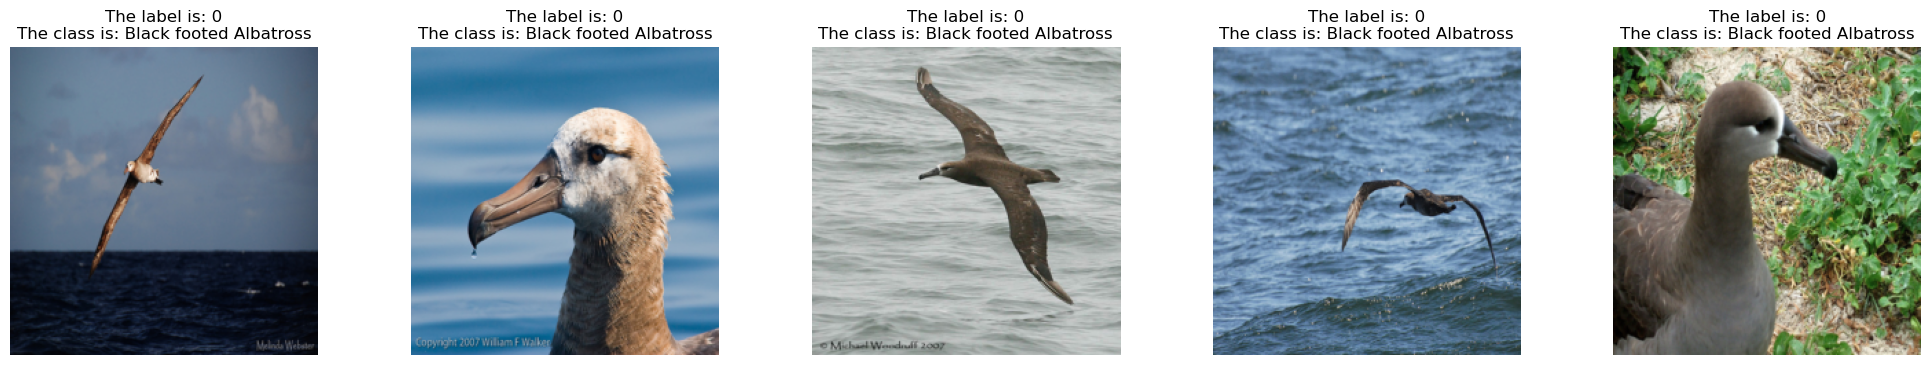

In [4]:
visualise_sample(train_dataset, number_of_samples=5)

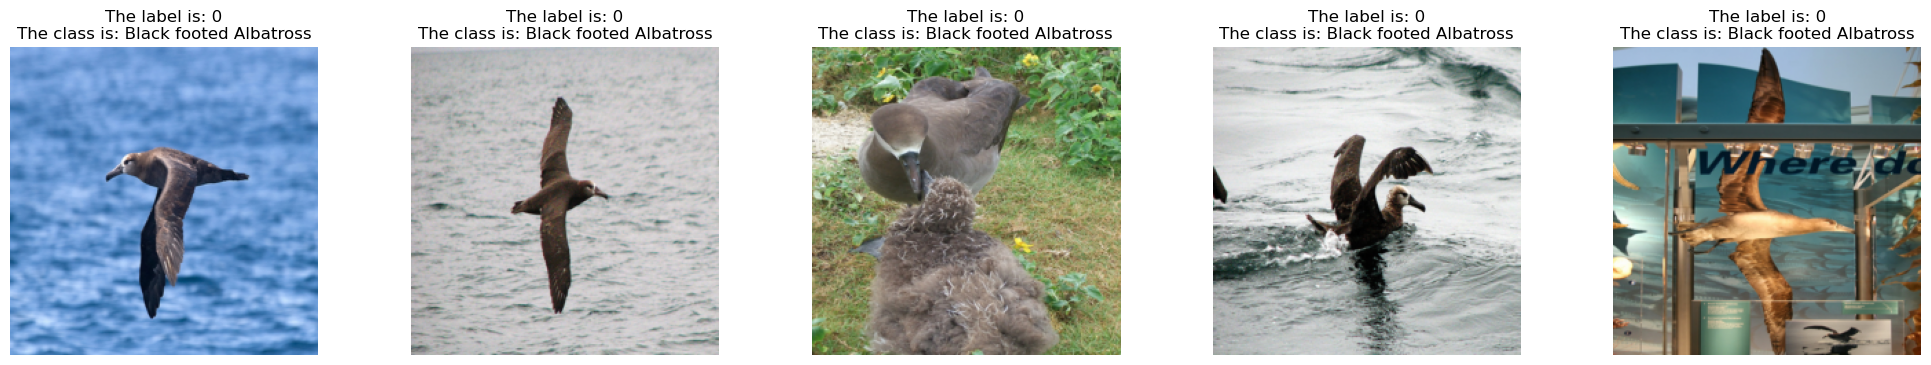

In [5]:
visualise_sample(test_dataset, number_of_samples=5)

In [6]:
def train_and_evaluate_model(is_trained=False, label_map=None, train_loader=None, val_loader=None, number_of_epochs=None , model_path = 'models/checkpoint.pt'):
    
    if label_map is None:
        raise ValueError("label_map parameter is empty !")
    if is_trained and (train_loader is None or val_loader is None or number_of_epochs is None):
        raise ValueError("Please provide all the required parameters for this function !")
    if os.path.exists(model_path):
        print('Loading model from the model path')
        model = load_model(BirdClassifier(number_of_class=len(label_map)), model_path)
    else:
        print(f'Creating new model')
        model = BirdClassifier(number_of_class=len(label_map))

    if is_trained:
        print('Training model')
        model = train_model(model, train_loader, val_loader, number_of_epochs=number_of_epochs)

    return model

In [7]:
model = train_and_evaluate_model(is_trained=True, label_map=label_map, train_loader=train_loader, val_loader=val_loader, number_of_epochs=NUMBER_OF_EPOCHS)

Creating new model
Training model


d:\Miniconda3\envs\myenv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/30 --- Loss: 5.06, Accuracy: 0.02
Validation --- Val Loss: 4.9590, Val Accuracy: 0.0332
Validation loss changed from (inf to 4.96).  Model saved !
Epoch 2/30 --- Loss: 4.16, Accuracy: 0.07
Validation --- Val Loss: 3.9216, Val Accuracy: 0.1013
Validation loss changed from (4.96 to 3.92).  Model saved !
Epoch 3/30 --- Loss: 3.38, Accuracy: 0.16
Validation --- Val Loss: 3.3397, Val Accuracy: 0.1827
Validation loss changed from (3.92 to 3.34).  Model saved !
Epoch 4/30 --- Loss: 2.82, Accuracy: 0.24
Validation --- Val Loss: 3.0116, Val Accuracy: 0.2525
Validation loss changed from (3.34 to 3.01).  Model saved !
Epoch 5/30 --- Loss: 2.33, Accuracy: 0.35
Validation --- Val Loss: 2.7660, Val Accuracy: 0.2957
Validation loss changed from (3.01 to 2.77).  Model saved !
Epoch 6/30 --- Loss: 1.90, Accuracy: 0.44
Validation --- Val Loss: 2.5863, Val Accuracy: 0.3580
Validation loss changed from (2.77 to 2.59).  Model saved !
Epoch 7/30 --- Loss: 1.51, Accuracy: 0.54
Validation --- Val Loss

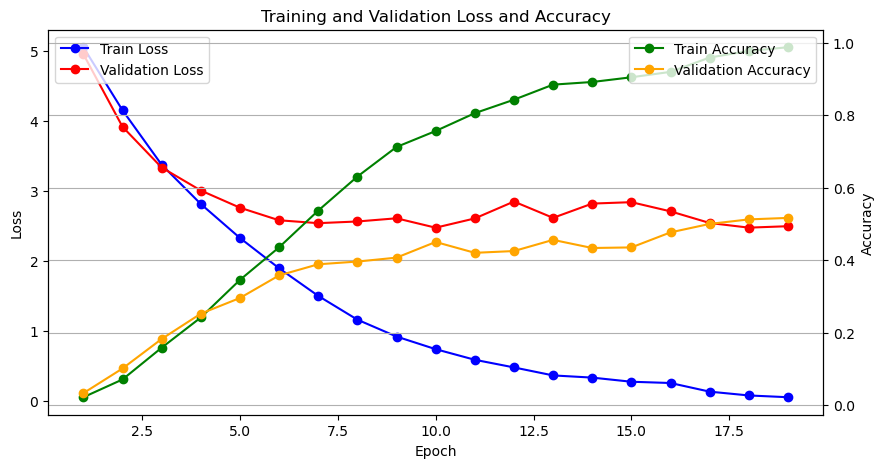

In [4]:
df = pd.read_csv('training_information.csv')
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
ax1.plot(df['Epoch'], df['Validation Loss'], marker='o', label='Validation Loss', color='red')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss and Accuracy')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(df['Epoch'], df['Train Accuracy'].apply(lambda s: float(s.split('(')[1].split(',')[0])), marker='o', label='Train Accuracy', color='green')
ax2.plot(df['Epoch'], df['Validation Accuracy'].apply(lambda s: float(s.split('(')[1].split(',')[0])), marker='o', label='Validation Accuracy', color='orange')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')
plt.grid()
plt.show()

In [9]:
evaluate_model(model, val_loader, number_of_class=len(label_map))

Top-1 accuracy: 0.5257
Average accuracy per class: 0.5170


{'top_1_accuracy': 0.5257475083056479,
 'average_accuracy_per_class': 0.5170416666666666}

In [10]:
predicted = predict(model, 'data/test/0000.jpg', label_map)

Prediction: tensor([0], device='cuda:0')
Class index: 0
Class name: Black footed Albatross
